<a href="https://colab.research.google.com/github/jfreedman340/Financial-Markets/blob/main/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

File ‘sp500sub.csv’ already there; not retrieving.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
df = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Name'], dtype='object')

In [ ]:
df['Name'].unique()

array(['INCY', 'GILD', 'DXC', 'AFL', 'XYL', 'ARE', 'AMD', 'WYNN', 'IBM',
       'ATVI', 'AES', 'GPC', 'PRU', 'HST', 'WMB', 'GOOG', 'SRE', 'HSIC',
       'UNP', 'UPS', 'K', 'LYB', 'MDT', 'COF', 'HAS', 'CSX', 'GT', 'SYF',
       'EBAY', 'KSS', 'AJG', 'JWN', 'SBUX', 'IT', 'PH', 'DVN', 'MMM',
       'SPG', 'AKAM', 'IP', 'CPB', 'KMI', 'AAPL', 'NEM', 'KMX', 'TSCO',
       'SYY', 'VNO', 'NWS', 'NBL', 'ACN', 'APH', 'PDCO', 'WLTW', 'FIS',
       'URI', 'CBOE', 'FISV', 'BA', 'UAA', 'CVS', 'WU', 'SLB', 'AIV',
       'VLO', 'MU', 'CAH', 'AZO', 'CCI', 'ZTS', 'MCO', 'ALLE', 'RHI',
       'UAL', 'IR', 'CB', 'VMC', 'GD', 'AAP', 'NEE', 'ABT', 'WFC', 'DIS',
       'SNA', 'MAR', 'JPM', 'CLX', 'KIM', 'SCG', 'HBI', 'ABBV', 'RSG',
       'ETR', 'ADBE', 'COO', 'HLT', 'INTU', 'SLG', 'GWW', 'COG', 'CBS',
       'FB', 'CMS', 'MDLZ'], dtype=object)

In [ ]:
# names = df['Name'].unique()
names = ['GOOG', 'SBUX', 'KSS', 'NEM']

In [ ]:
252/2

126.0

In [ ]:
all_dates = df.index.unique().sort_values()

In [ ]:
len(all_dates)

2267

In [ ]:
all_dates.get_loc('2014-01-02')

1007

In [ ]:
all_dates.get_loc('2014-06-30')

1130

In [ ]:
start = all_dates.get_loc('2014-01-02')
end = all_dates.get_loc('2014-06-30')
dates = all_dates[start:end+1]

In [ ]:
type(dates)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
len(dates)

124

In [ ]:
close_prices = pd.DataFrame(index=dates)

In [ ]:
for name in names:
  tmpl = df.loc[dates]
  df_sym = tmpl[tmpl['Name'] == name]
  df_tmp = pd.DataFrame(data=df_sym['Close'].to_numpy(), \
                        index=df_sym.index, columns=[name])
  close_prices = close_prices.join(df_tmp)

In [ ]:
close_prices.head()

,GOOG,SBUX,KSS,NEM
Date,,,,
2014-01-02,554.481689,38.584999,56.990002,23.959999
2014-01-03,550.436829,38.474998,56.860001,23.920000
2014-01-06,556.573853,38.084999,56.040001,24.080000
2014-01-07,567.303589,38.605000,56.099998,23.950001
2014-01-08,568.484192,39.014999,55.180000,23.400000


In [ ]:
close_prices.isna().sum().sum()

0

In [ ]:
close_prices.fillna(method='ffill', inplace=True)

In [ ]:
close_prices.isna().sum().sum()

0

In [ ]:
# empty dataframe
returns = pd.DataFrame(index=dates[1:])

In [ ]:
for name in names:
  # log returns
  current_returns = close_prices[name].pct_change()
  returns[name] = current_returns.iloc[1:] * 100

In [ ]:
returns.head()

,GOOG,SBUX,KSS,NEM
Date,,,,
2014-01-03,-0.729485,-0.285086,-0.228112,-0.166941
2014-01-06,1.114937,-1.013644,-1.442138,0.668896
2014-01-07,1.927819,1.365368,0.107062,-0.539864
2014-01-08,0.208108,1.062038,-1.639925,-2.296456
2014-01-09,-0.962997,-0.551071,0.688657,-0.854696


In [ ]:
mean_return = returns.mean()

In [ ]:
mean_return

GOOG    0.038691
SBUX    0.009955
KSS    -0.053793
NEM     0.072932
dtype: float64

In [ ]:
cov = returns.cov()

In [ ]:
cov

,GOOG,SBUX,KSS,NEM
GOOG,2.206565,0.832469,0.771772,-0.033600
SBUX,0.832469,1.558406,0.714586,0.374448
KSS,0.771772,0.714586,2.025854,0.180308
NEM,-0.033600,0.374448,0.180308,4.815104


In [ ]:
cov_np = cov.to_numpy()

In [ ]:
N = 10000
D = len(mean_return)
returns = np.zeros(N)
risks = np.zeros(N)
for i in range(N):
  rand_range = 1.0
  w = np.random.random(D)*rand_range - rand_range / 2 # with short-selling
  w[-1] = 1 - w[:-1].sum()
  np.random.shuffle(w)
  ret = mean_return.dot(w)
  risk = np.sqrt(w.dot(cov_np).dot(w))
  returns[i] = ret
  risks[i] = risk


In [ ]:
single_asset_returns = np.zeros(D)
single_asset_risks = np.zeros(D)
for i in range(D):
  ret = mean_return[i]
  risk = np.sqrt(cov_np[i,i])

  single_asset_returns[i] = ret
  single_asset_risks[i] = risk

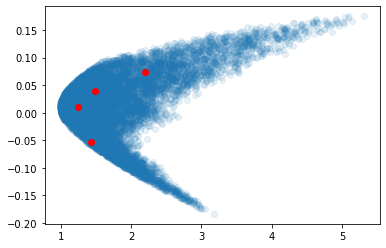

In [ ]:
plt.scatter(risks, returns, alpha=0.1);
plt.scatter(single_asset_risks, single_asset_returns, c='red');

In [ ]:
for idx, val in cov['GOOG'].iteritems():
  print(idx, val)

GOOG 2.2065647788398772
SBUX 0.8324690007152389
KSS 0.7717715673917706
NEM -0.03360028033416302
